In [1]:
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt


#### LOAD DATA

In [2]:
npzfile = np.load('data/data_d1_d2_data.npz')
features = npzfile['features']
labels = npzfile['labels']
groups = npzfile['groups']
features = np.nan_to_num(features)

#### LOAD MODEL

In [3]:
opt = joblib.load('model/model_xgboost_data_d1_d2.pkl')
best_model = opt.best_estimator_.steps[0][1]

#### LOAD COLUMN

In [4]:
column_names = pd.read_csv('column_used', delimiter=",")
column_names = column_names.columns
len(column_names)

22

#### SHAP EXPLAINER

In [5]:
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(features)

In [6]:
shap_values[0].shape

(15772, 22)

#### SHAP VALUES

In [7]:
zero = shap_values[0]
one = shap_values[1]
two = shap_values[2]

np.savez('values/shap_value_d1_d2.npz', zero=zero, one=one, two=two)

In [8]:
loaded_data = np.load("values/shap_value_d1_d2.npz")
zero = loaded_data["zero"]
one = loaded_data["one"]
two = loaded_data["two"]
loaded_array = [zero, one, two]

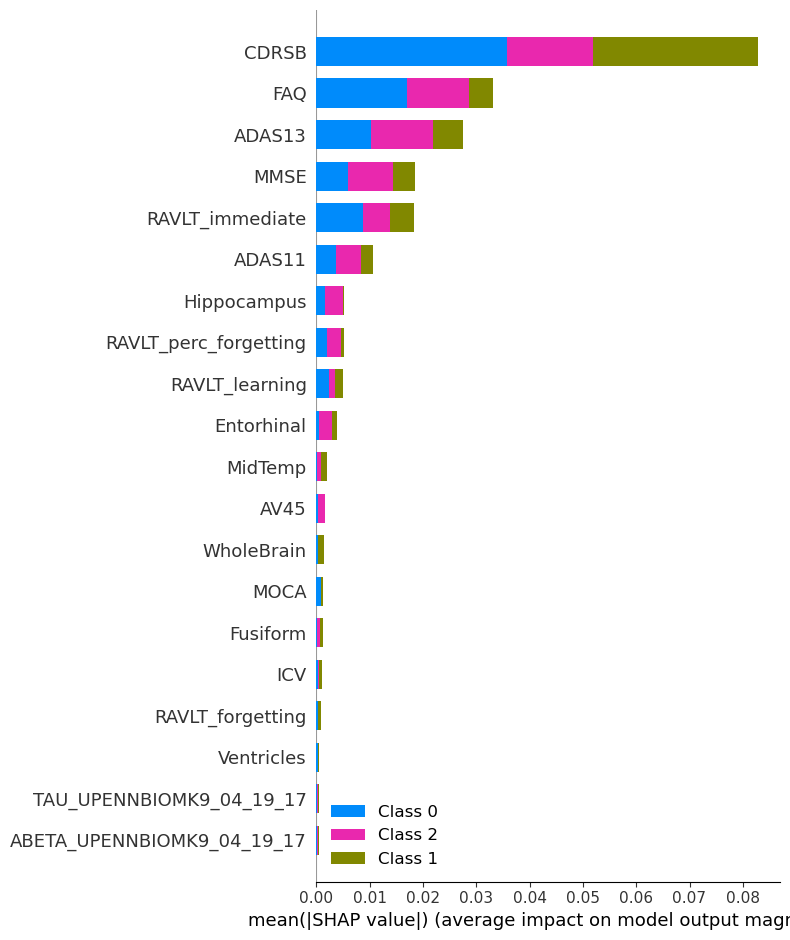

In [9]:
shap.summary_plot(loaded_array, features,feature_names=column_names)

#### SHAP INTERACTION VALUES

In [10]:
shap_interaction_values = explainer.shap_interaction_values(features)

In [11]:
np.savez("values/interaction_value_d1_d2.npz",values = shap_interaction_values)

In [12]:
shap_interaction_values_load = np.load("values/interaction_value_d1_d2.npz")
shap_interaction_values = shap_interaction_values_load["values"]

In [13]:
shap_interaction_values.shape

(3, 15772, 22, 22)